In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
# extraction and description of data
path = '/content/drive/MyDrive/INternship/Major Project/IMDB Dataset.csv/IMDB Dataset.csv'
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

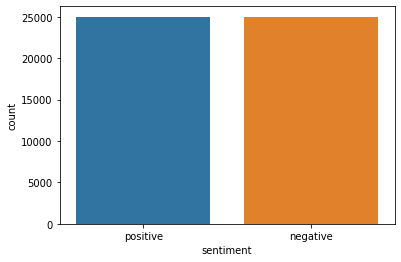

In [ ]:
sns.countplot(x = df['sentiment'])

In [ ]:
df.drop(df.tail(10000).index,
        inplace = True)



In [ ]:
df.sentiment.value_counts()

negative    20007
positive    19993
Name: sentiment, dtype: int64

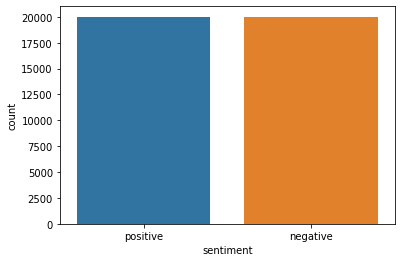

In [ ]:
sns.countplot(x = df['sentiment'])

In [ ]:
#DATA preprocessing
import re
stop_words = stopwords.words('english')
len(stop_words)
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)
    
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("<br /><br />", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = re.sub("[0-9]", " ",sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample 


In [ ]:
ps = PorterStemmer()
filter_review = []
for sentence in df['review']:
  filter_sentence = []
  sentence = sentence.replace('<br /><br />',' ')
  sentence = re.sub('[^a-zA-Z]',' ',sentence)
  sentence = sentence.lower()
  for word in nltk.word_tokenize(sentence):
    if word not in stopwords.words('english'):
      filter_sentence.append(ps.stem(word))
  filter_sentence = ' '.join(word for word in filter_sentence)
  filter_review.append(filter_sentence)
    #applying stemming

In [ ]:
#Lets view the transformed text
x = np.array(filter_review)
type(x)


numpy.ndarray

In [ ]:
tf = TfidfVectorizer()
from sklearn.svm import SVC

In [ ]:
y = df['sentiment'].values
y = np.array(y)

In [ ]:
#= df['sentiment'].apply(lambda x : 0 if x=='positive' else 1) encoding output

In [ ]:
#spliting test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
#Tfidf vectorizer
'''x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)'''


'x_train = tf.fit_transform(x_train)\nx_test = tf.transform(x_test)'

In [ ]:
'''from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
y_pred'''

'from sklearn.svm import SVC\nsv = SVC()\nsv.fit(x_train,y_train)\ny_pred = sv.predict(x_test)\ny_pred'

In [ ]:
'''from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)*100'''

'from sklearn.metrics import accuracy_score,confusion_matrix,classification_report\naccuracy_score(y_pred,y_test)*100'

In [ ]:
#confusion_matrix(y_pred,y_test)

In [ ]:
#print(classification_report(y_pred,y_test))

In [ ]:
#text = df.review[4]
#text

In [ ]:
#text =tf.transform([text])

In [ ]:
#sv.predict(text)

In [ ]:
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect',TfidfVectorizer()),('model',SVC())])

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', de

In [ ]:
y_pred = text_model.predict(x_test)
y_pred[:10]

array(['positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'negative', 'positive'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print(accuracy_score(y_pred,y_test),'\n',confusion_matrix(y_pred,y_test),'\n',classification_report(y_pred,y_test))


0.8925 
 [[4468  444]
 [ 631 4457]] 
               precision    recall  f1-score   support

    negative       0.88      0.91      0.89      4912
    positive       0.91      0.88      0.89      5088

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
import joblib
joblib.dump(text_model,'imdb-rating')

['imdb-rating']